In [1]:
import os
import pathlib
import cv2
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances,log_loss
import math
import time
import sys
import random

# Water mark Logo

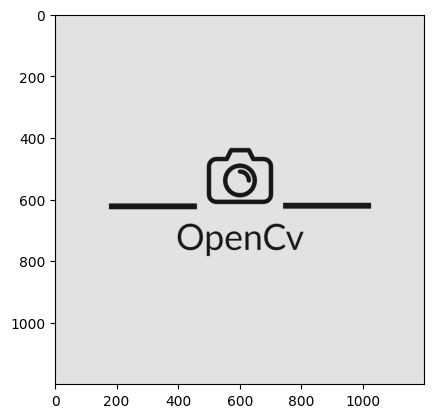

In [2]:
watermark = cv2.imread('3.jpeg')
plt.imshow(watermark)
plt.show()

# Image Watermark Addition

In [3]:
def scale(image,scale_width):
    height = image.shape[0]
    width = image.shape[1]
    scaled_height = (scale_width/height*width)
    scaled_height = int(scaled_height)
    #print(scale_width,scaled_height)
    resized_img = cv2.resize(image,(scale_width,scaled_height))
    return resized_img

In [4]:
def logloss(y_true, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -(y_true * np.log(y_pred)).sum(axis=1).mean()

In [5]:
data_dir = './Image Dataset - Copy//'
data_dir = pathlib.Path(data_dir)
data_dir
img_list = list(data_dir.glob('*'))
x = []
for imgs in img_list:
    pic = cv2.imread(str(imgs))
    pic=cv2.resize(pic,(600,600))
    x.append(pic)
x = np.array(x)
x.shape[0]

12

In [6]:
def watermark_func(x,watermark):
    new_img = []
    wimg=[]
    mse_loss = []
    pairwise = []
    log = []
    path = 'E:\IIT JODHPUR AI\Courses Materials\Projects\Computer Vision\Picture Watermarked Images'
    j=0
    watermark = scale(watermark,50)
    watermark_height = watermark.shape[0]
    watermark_width = watermark.shape[1]
    for i in x:
        i=cv2.resize(i,(600,600))
        img_height = i.shape[0]
        img_width = i.shape[1]
        overlay = np.zeros((img_height,img_width,3),dtype='uint8')
        overlay[img_height-watermark_height:img_height,img_width-watermark_width:img_width] = watermark
        new = cv2.addWeighted(overlay.copy(),0.8,i.copy(),1.0,0,i.copy())
        new_img.append(new)
        k = "Picture Watermarked Images/" +str(j)+".jpg"
        #print((k))
        j = j+1
        cv2.imwrite(str(k),new)
        wimg.append(new)
        mse_loss.append(mean_squared_error(i.reshape(3,img_height*img_width), new.reshape(3,img_height*img_width)))
        pairwise.append(pairwise_distances(i.reshape(3,img_height*img_width), new.reshape(3,img_height*img_width)).mean())
        log.append(logloss(i.reshape(3,img_height*img_width), new.reshape(3,img_height*img_width)))
        #print("MSE Loss:",mse_loss[i],"Pair Loss :" , pairwise[i],"Log Loss=",log[i])
    return new_img,wimg,mse_loss,pairwise,log

In [7]:
images,wimg,mse,pairwise,log = watermark_func(x,watermark)

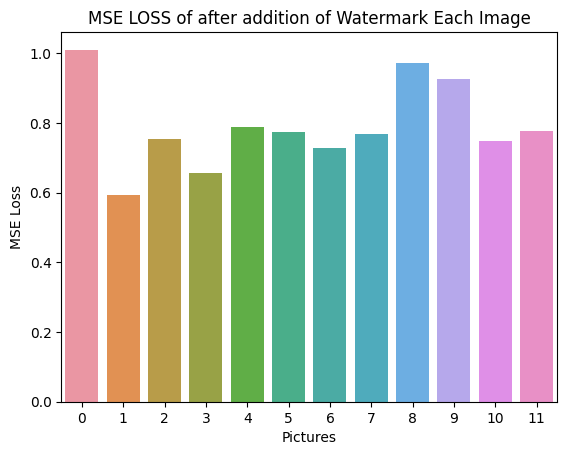

In [8]:
import seaborn as sns 
sns.barplot(y = mse,x = np.arange(0,len(x),1))
plt.title("MSE LOSS of after addition of Watermark Each Image")
plt.xlabel('Pictures')
plt.ylabel('MSE Loss')
plt.show()

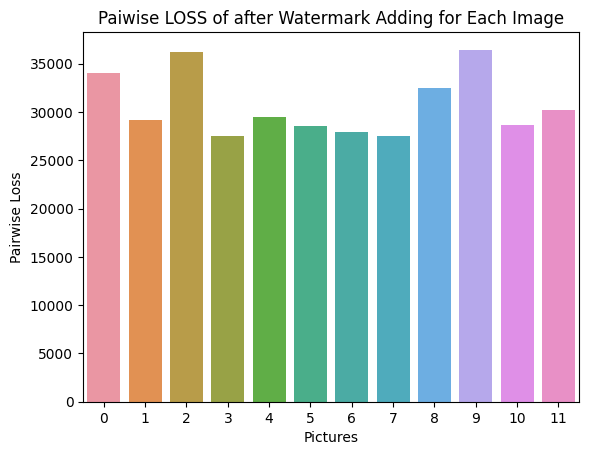

In [9]:
import seaborn as sns 
sns.barplot(y = pairwise,x = np.arange(0,len(x),1))
plt.title("Paiwise LOSS of after Watermark Adding for Each Image")
plt.xlabel('Pictures')
plt.ylabel('Pairwise Loss')
plt.show()

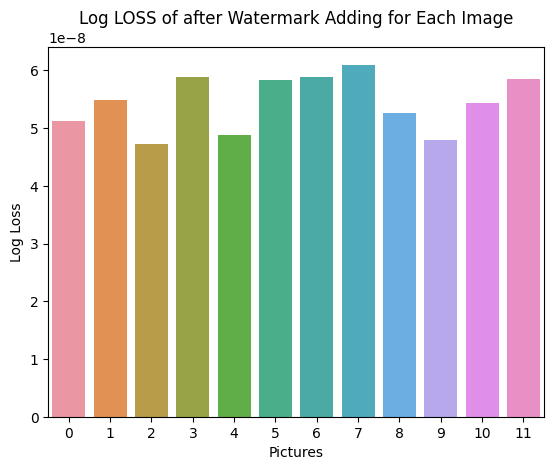

In [10]:
import seaborn as sns 
sns.barplot(y = log,x = np.arange(0,len(x),1))
plt.title("Log LOSS of after Watermark Adding for Each Image")
plt.xlabel('Pictures')
plt.ylabel('Log Loss')
plt.show()

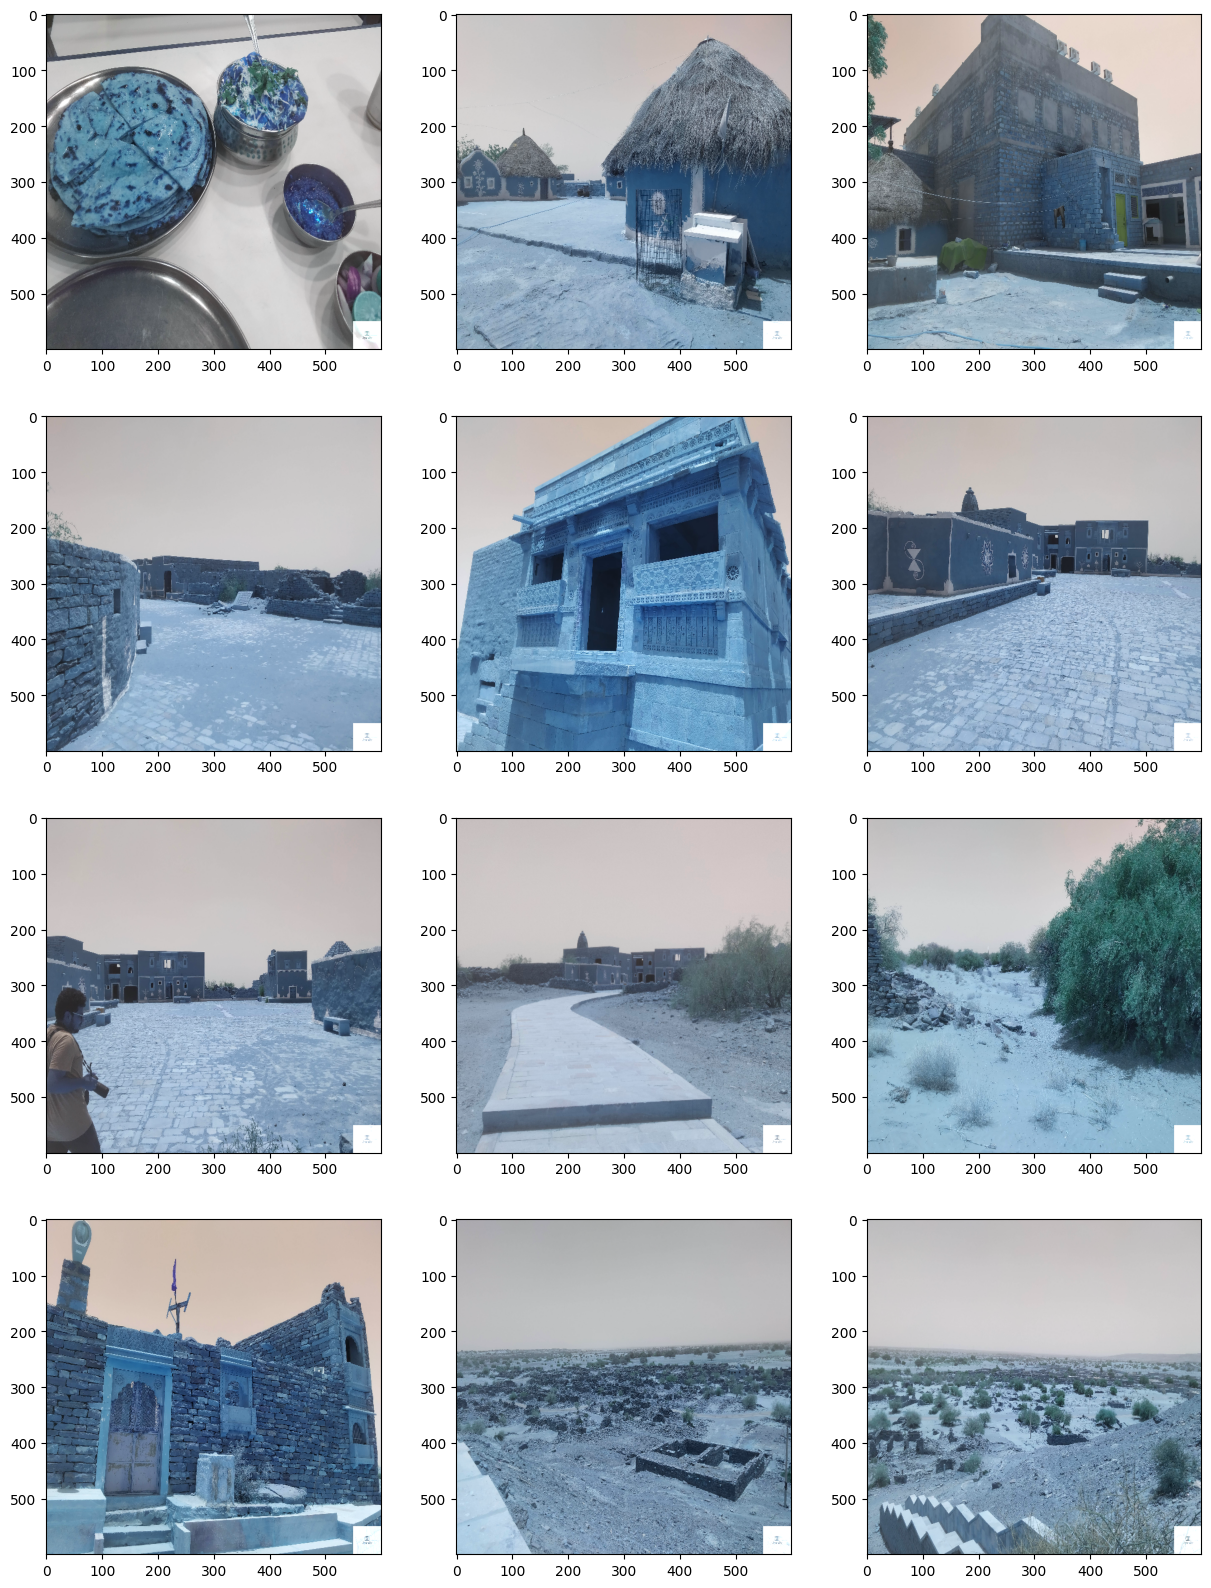

In [11]:
import matplotlib.pyplot as plt
# Display the images from the ss list using subplots with multiple rows
num_imgs = len(x)
num_cols = 3
num_rows = (num_imgs + num_cols - 1) // num_cols
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i in range(num_imgs):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].imshow(wimg[i])   
plt.show()

# Removal Normal Image Watermark

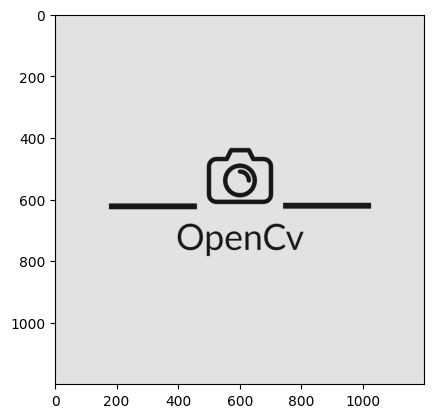

In [20]:
template = cv2.imread('3.jpeg')
plt.imshow(template)
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
def scale(image,scale_width):
    height = image.shape[0]
    width = image.shape[1]
    scaled_height = (scale_width/height*width)
    scaled_height = int(scaled_height)
    #print(scale_width,scaled_height)
    resized_img = cv2.resize(image,(scale_width,scaled_height))
    return resized_img

In [22]:
template = scale(template,50)

In [23]:
def watermark_remover(img,template):
    removed_logo = []
    mse_loss = []
    pairwise=[]
    log=[]
    path1 = 'E:\IIT JODHPUR AI\Courses Materials\Projects\Computer Vision\Removed Watermark'
    j=0
    for i in range(len(img)):
        img[i]=cv2.resize(img[i],(600,600))
        a = img[i]
        img_height = a.shape[0]
        img_width = a.shape[1]
        result = cv2.matchTemplate(a.copy(), template.copy(), cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        top_left = max_loc
        h, w = template.shape[:2]
        bottom_right = (top_left[0] + w, top_left[1] + h)

        # Create a mask of the area to be inpainted
        mask = np.zeros(img[i].shape[:2], np.uint8)
        mask[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 255

        # Inpaint the area where the template was located
        inpainting = cv2.inpaint(img[i], mask, 3, cv2.INPAINT_TELEA)
        removed_logo.append(inpainting)
        h = img[i].shape[0]
        w= img[i].shape[1]
        k = "Removed Watermark/" +str(j)+".jpg"
        j = j+1
        cv2.imwrite(str(k),inpainting)
        #print(h,w)
        mse_loss.append(mean_squared_error(a.reshape(3,img_height*img_width), inpainting.reshape(3,img_height*img_width)))
        pairwise.append(pairwise_distances(a.reshape(3,img_height*img_width), inpainting.reshape(3,img_height*img_width)).mean())
        log.append(logloss(a.reshape(3,img_height*img_width), inpainting.reshape(3,img_height*img_width)))
        print("MSE Loss:",mse_loss[i],"Pair Loss :" , pairwise[i],"Log Loss=",log[i])
    return removed_logo,mse_loss,pairwise,log

In [24]:
removed_images,mse3,pairwise3,log3 = watermark_remover(images,template)

MSE Loss: 0.7164768518518517 Pair Loss : 33875.29547590597 Log Loss= 5.1617215168775494e-08
MSE Loss: 0.5744398148148149 Pair Loss : 29150.148402599385 Log Loss= 5.50828519463309e-08
MSE Loss: 0.6970898148148148 Pair Loss : 36266.626157350445 Log Loss= 4.7521365842406744e-08
MSE Loss: 0.5490388888888889 Pair Loss : 27481.391549019798 Log Loss= 5.908792188868973e-08
MSE Loss: 0.7204861111111112 Pair Loss : 29523.40385732947 Log Loss= 4.908346262766373e-08
MSE Loss: 0.8104064814814814 Pair Loss : 28536.92048696762 Log Loss= 5.844452288794601e-08
MSE Loss: 0.7200083333333333 Pair Loss : 28028.464132750916 Log Loss= 5.9158970722172917e-08
MSE Loss: 0.8155166666666667 Pair Loss : 27384.32143329378 Log Loss= 6.119990847430758e-08
MSE Loss: 0.829978703703704 Pair Loss : 32512.548836167593 Log Loss= 5.27732557653593e-08
MSE Loss: 0.8145018518518519 Pair Loss : 36291.28728477842 Log Loss= 4.8362744142771425e-08
MSE Loss: 0.7781722222222224 Pair Loss : 28571.227868469578 Log Loss= 5.471200259510

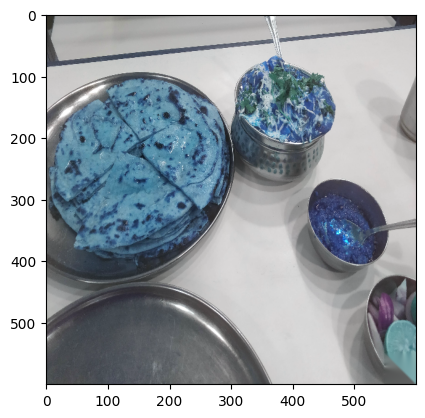

In [25]:
plt.imshow(removed_images[0])

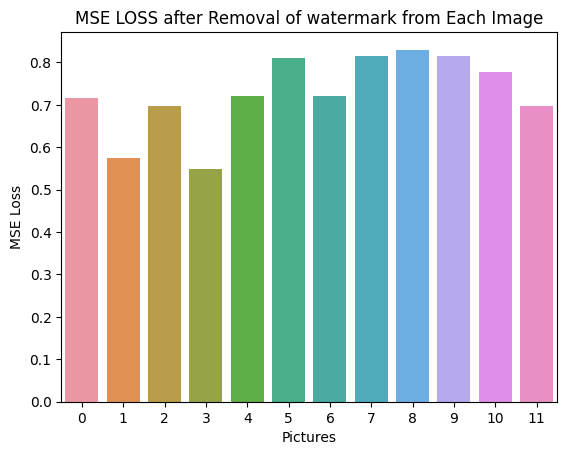

In [26]:
import seaborn as sns 
sns.barplot(y = mse3,x = np.arange(0,len(removed_images),1))
plt.title("MSE LOSS after Removal of watermark from Each Image")
plt.xlabel('Pictures')
plt.ylabel('MSE Loss')
plt.show()

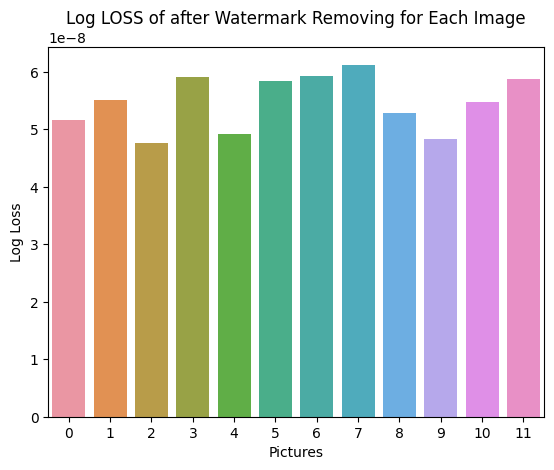

In [27]:
import seaborn as sns 
sns.barplot(y = log3,x = np.arange(0,len(images),1))
plt.title("Log LOSS of after Watermark Removing for Each Image")
plt.xlabel('Pictures')
plt.ylabel('Log Loss')
plt.show()

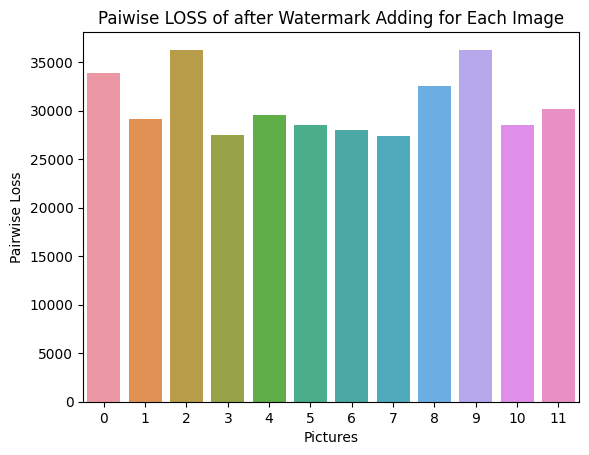

In [28]:
import seaborn as sns 
sns.barplot(y = pairwise3,x = np.arange(0,len(removed_images),1))
plt.title("Paiwise LOSS of after Watermark Adding for Each Image")
plt.xlabel('Pictures')
plt.ylabel('Pairwise Loss')
plt.show()

# Before and After Image watermarking

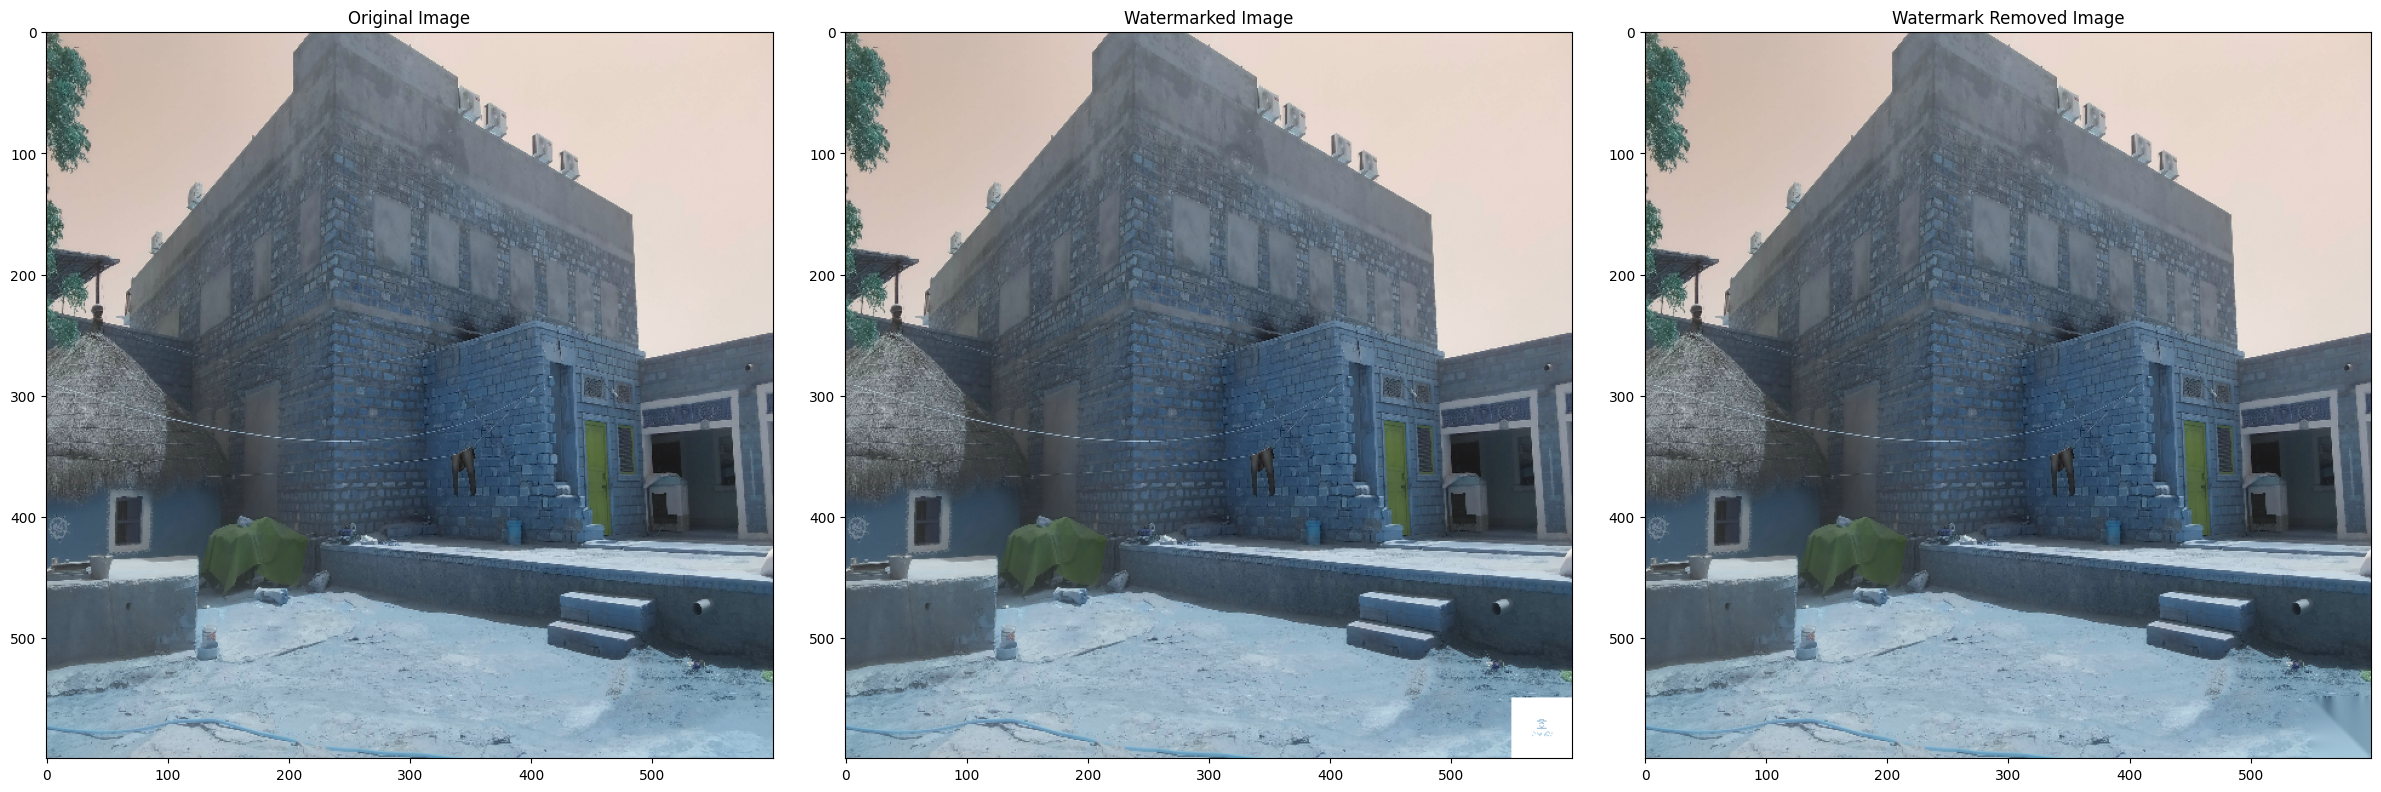

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(30, 20))
axs[0].imshow(x[2]),axs[0].set_title('Original Image')
axs[1].imshow(images[2]),axs[1].set_title('Watermarked Image')
axs[2].imshow(removed_images[2]),axs[2].set_title('Watermark Removed Image')
plt.subplots_adjust(wspace=0.1)
#print(f'Mse loss is: {b[1]:.2f}')
plt.show()

# Rotated Watermark addition 

In [30]:
'''template = cv2.imread('3.jpeg')
angle = 45
center = tuple(np.array(template.shape[1::-1]) / 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_template = cv2.warpAffine(template, M, template.shape[1::-1], flags=cv2.INTER_LINEAR)
plt.imshow(rotated_template)
plt.show()'''

"template = cv2.imread('3.jpeg')\nangle = 45\ncenter = tuple(np.array(template.shape[1::-1]) / 2)\nM = cv2.getRotationMatrix2D(center, angle, 1.0)\nrotated_template = cv2.warpAffine(template, M, template.shape[1::-1], flags=cv2.INTER_LINEAR)\nplt.imshow(rotated_template)\nplt.show()"

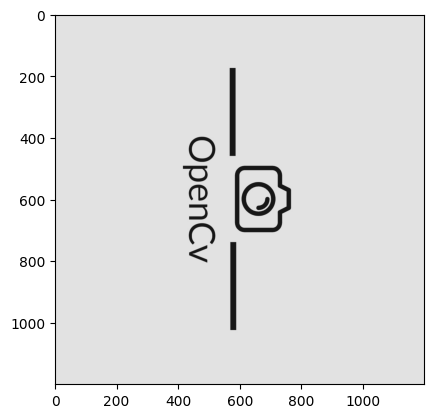

In [31]:
template = cv2.imread('3.jpeg')
rotated_template = cv2.rotate(template, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rotated_template)
plt.show()

In [32]:
def scale(image,scale_width):
    height = image.shape[0]
    width = image.shape[1]
    scaled_height = (scale_width/height*width)
    scaled_height = int(scaled_height)
    #print(scale_width,scaled_height)
    resized_img = cv2.resize(image,(scale_width,scaled_height))
    return resized_img

In [33]:
data_dir = './Image Dataset - Copy//'
data_dir = pathlib.Path(data_dir)
data_dir
img_list = list(data_dir.glob('*'))
x = []
for imgs in img_list:
    pic = cv2.imread(str(imgs))
    pic=cv2.resize(pic,(600,600))
    x.append(pic)
x = np.array(x)
x.shape[0]

12

In [34]:
def watermark_func(x,watermark):
    new_img = []
    wimg=[]
    path = 'E:\IIT JODHPUR AI\Courses Materials\Projects\Computer Vision\Rotated Watermarked Images'
    j=0
    watermark = scale(watermark,200)
    watermark_height = watermark.shape[0]
    watermark_width = watermark.shape[1]
    for i in x:
        i=cv2.resize(i,(1024,1024))
        img_height = i.shape[0]
        img_width = i.shape[1]
        overlay = np.zeros((img_height,img_width,3),dtype='uint8')
        overlay[img_height-watermark_height:img_height,img_width-watermark_width:img_width] = watermark
        new = cv2.addWeighted(overlay.copy(),0.8,i.copy(),1.0,0,i.copy())
        new_img.append(new)
        k = "Rotated Watermarked Images/" +str(j)+".jpg"
        #print((k))
        j = j+1
        cv2.imwrite(str(k),new)
        wimg.append(new)
    return new_img,wimg

In [35]:
images1,wimg1 = watermark_func(x,rotated_template)

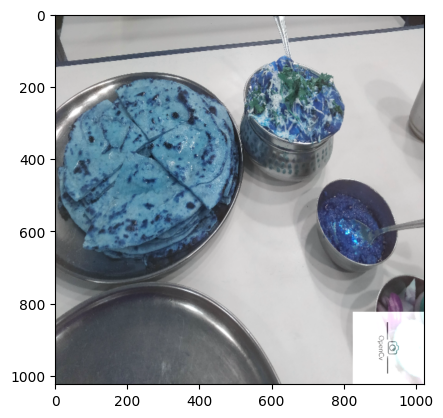

In [36]:
plt.imshow(wimg1[0])

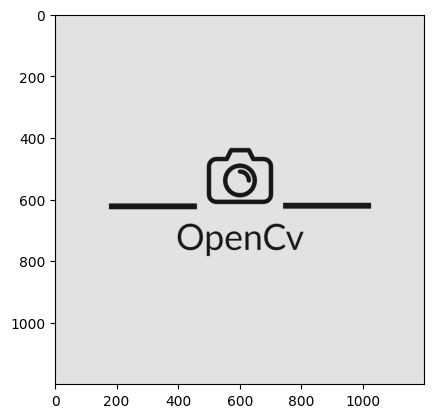

In [37]:
plt.imshow(template)

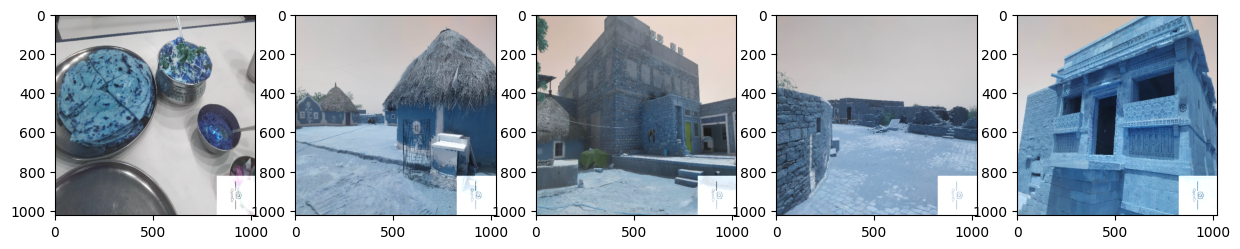

In [38]:
import matplotlib.pyplot as plt

# Display the first 5 images from the ss list using subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axs[i].imshow(wimg1[i])
plt.show()

# Text Watermark Addition

In [12]:
data_dir = './Image Dataset - Copy//'
data_dir = pathlib.Path(data_dir)
data_dir
img_list = list(data_dir.glob('*'))
x1 = []
for imgs in img_list:
    pic = cv2.imread(str(imgs))
    pic=cv2.resize(pic,(600,600))
    x1.append(pic)
x1 = np.array(x1)
x1.shape[0]

12

In [13]:
import random
import random
from sklearn.metrics import mean_squared_error, pairwise_distances, log_loss

def add_text(img_list, text):
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    thickness = 2
    new1 = []
    mse_loss = []
    pairwise = []
    log = []
    j = 0
    for img in img_list:
        img_height=img.shape[0]
        img_width=img.shape[1]
        # Calculate the position for the watermark
        text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
        x = random.randint(0, img.shape[1] - text_size[0])
        y = random.randint(0, img.shape[0] - text_size[1])

        # Draw the text on the image
        new= cv2.putText(img.copy(), text, (x, y), font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)

        # Save the result
        k = "Text Watermarked Images/" + str(j) + ".jpg"
        cv2.imwrite(k, new)
        new1.append(new)

        # Calculate the losses
        mse_loss.append(mean_squared_error(img.reshape(3,img_height*img_width), new.reshape(3,img_height*img_width)))
        pairwise.append(pairwise_distances(img.reshape(3,img_height*img_width), new.reshape(3,img_height*img_width)).mean())
        log.append(logloss(img.reshape(3,img_height*img_width), new.reshape(3,img_height*img_width)))
        j += 1
        #print("MSE Loss:",mse_loss[i],"Pair Loss :" , pairwise[i],"Log Loss=",log[i])

    return new1, mse_loss, pairwise, log

In [14]:
text = "This is copywrited Images"
ss,mse_loss1,pairwise1,log2 = add_text(x1,text)

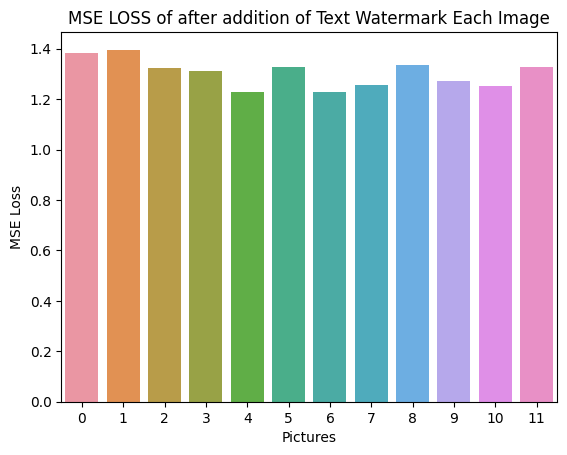

In [15]:
import seaborn as sns 
sns.barplot(y = mse_loss1,x = np.arange(0,len(ss),1))
plt.title("MSE LOSS of after addition of Text Watermark Each Image")
plt.xlabel('Pictures')
plt.ylabel('MSE Loss')
plt.show()

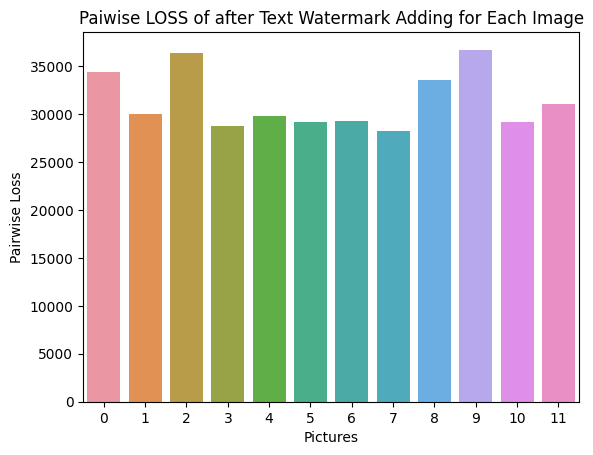

In [16]:
import seaborn as sns 
sns.barplot(y = pairwise1,x = np.arange(0,len(ss),1))
plt.title("Paiwise LOSS of after Text Watermark Adding for Each Image")
plt.xlabel('Pictures')
plt.ylabel('Pairwise Loss')
plt.show()

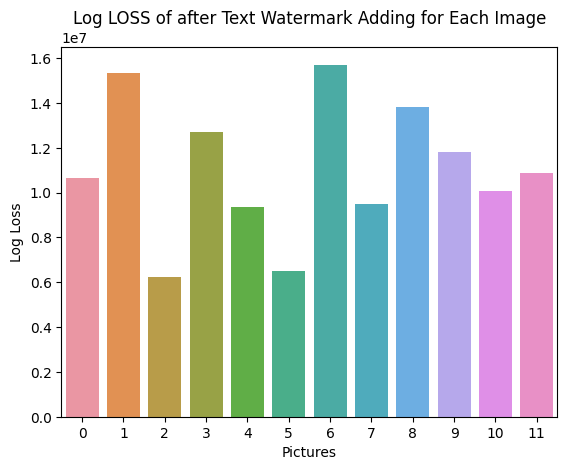

In [17]:
import seaborn as sns 
sns.barplot(y = log2,x = np.arange(0,len(ss),1))
plt.title("Log LOSS of after Text Watermark Adding for Each Image")
plt.xlabel('Pictures')
plt.ylabel('Log Loss')
plt.show()

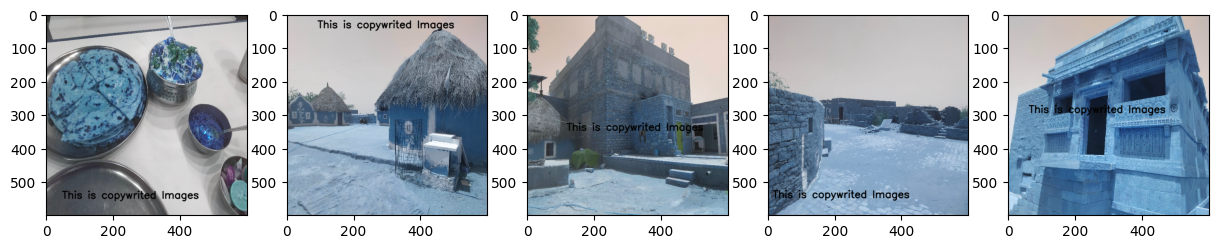

In [19]:
import matplotlib.pyplot as plt
# Display the first 5 images from the ss list using subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axs[i].imshow(ss[i])
plt.show()

# Remove Text Watermark from Image- Method 1 

In [41]:
import cv2
import imutils
import pytesseract
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

(410, 22)
(480, 640, 3)


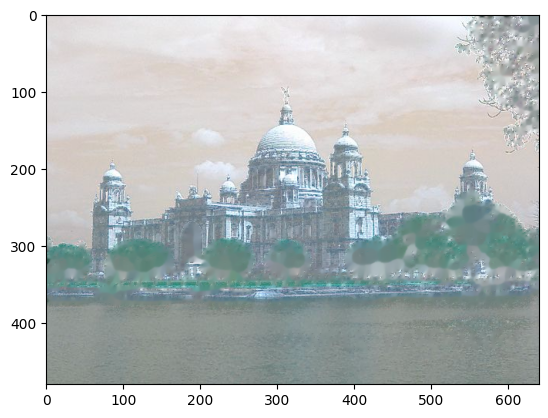

In [42]:
img = cv2.imread("withtext.png")
#img.shape

#img=cv2.resize(img,(500,600))
#print(img.shape)

# Define the watermark text and font
def add_text(image,text):
    #text = "SAMPLE WATERMARK"
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    thickness = 2
    new = []
    j = 0
    text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
    print(text_size)
    x = random.randint(0, image.shape[1] - text_size[0])
    y = random.randint(0, image.shape[0] - text_size[1])

        # Draw the text on the image
    cv2.putText(image, text, (x, y), font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)
    k = "Text Watermarked Images/" +str(j)+".jpg"
    j = j+1
    cv2.imwrite(str(k),image)
    return image

text = "This is copywrited Images"
ss = add_text(img,text)

plt.imshow(ss)


# Load the image and convert it to grayscale
image = img.copy()
print(image.shape)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to preprocess the image
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.imshow(thresh)

# Find contours in the image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Loop over the contours and detect the text regions using pytesseract
for c in cnts:
    # Compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    
    # Extract the text region from the image
    roi = image[y:y + h, x:x + w]
    
    # Apply OCR to the text region
    text = pytesseract.image_to_string(roi)
    
    # If the text is detected, fill the region with surrounding pixels using inpainting
    if len(text) > 0:
        mask = cv2.inRange(image, (0,0,0), (125,125,125))
        result = cv2.inpaint(image, mask, 15, cv2.INPAINT_NS)
        break

# Display the result
plt.imshow(result)